**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series

In [2]:
import warnings
warnings.filterwarnings("ignore")

**Data Ingestion**

* Train Dataset : Count of Passengers commutted at a given hour
* Test Dataset  : 7 Months Time Period for which predictions need to be made

In [3]:
train_original=pd.read_csv("Train.csv",parse_dates=['Datetime'],dayfirst=True)
test_original=pd.read_csv("Test.csv",parse_dates=['Datetime'],dayfirst=True)

In [4]:
train_original

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2
...,...,...,...
18283,18283,2014-09-25 19:00:00,868
18284,18284,2014-09-25 20:00:00,732
18285,18285,2014-09-25 21:00:00,702
18286,18286,2014-09-25 22:00:00,580


In [ ]:
test_original

In [5]:
data=train_original.copy()

In [6]:
data.set_index('Datetime',inplace=True)
data

,ID,Count
Datetime,,
2012-08-25 00:00:00,0,8
2012-08-25 01:00:00,1,2
2012-08-25 02:00:00,2,6
2012-08-25 03:00:00,3,2
2012-08-25 04:00:00,4,2
...,...,...
2014-09-25 19:00:00,18283,868
2014-09-25 20:00:00,18284,732
2014-09-25 21:00:00,18285,702


In [7]:
data.drop('ID',axis=1,inplace=True)
data

,Count
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2
...,...
2014-09-25 19:00:00,868
2014-09-25 20:00:00,732
2014-09-25 21:00:00,702


# <center> Approach - 2 [Statistical Technique ]

<img src ="flowchart.jpg">

# Task One: Time Series Visualization and Explanatory Analysis

**Hypothesis Generation** 
* 1. There will be an increase in the trafc as the years pass by.
Explanation - Population has a general upward trend with time, so I can expect more
people to travel by JetRail. Also, generally companies expand their businesses over time
leading to more customers travelling through JetRail.
* 2. The trafc will be high from May to October.
Explanation - Tourist visits generally increases during this time perion.
* 3. Trafc on weekdays will be more as compared to weekends/holidays.
Explanation - People will go to ofce on weekdays and hence the trafc will be more
* 4. Trafc during the peak hours will be high.
Explanation - People will travel to work, college.

In [8]:
data['Year']=data.index.year
data['Month']=data.index.month
data['Day']=data.index.day
data['Hour']=data.index.hour
data['dayOfWeek']=data.index.dayofweek
data['is_weekend'] = data.index.weekday.isin([5,6])*1
data

,Count,Year,Month,Day,Hour,dayOfWeek,is_weekend
Datetime,,,,,,,
2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2,2012,8,25,4,5,1
...,...,...,...,...,...,...,...
2014-09-25 19:00:00,868,2014,9,25,19,3,0
2014-09-25 20:00:00,732,2014,9,25,20,3,0
2014-09-25 21:00:00,702,2014,9,25,21,3,0


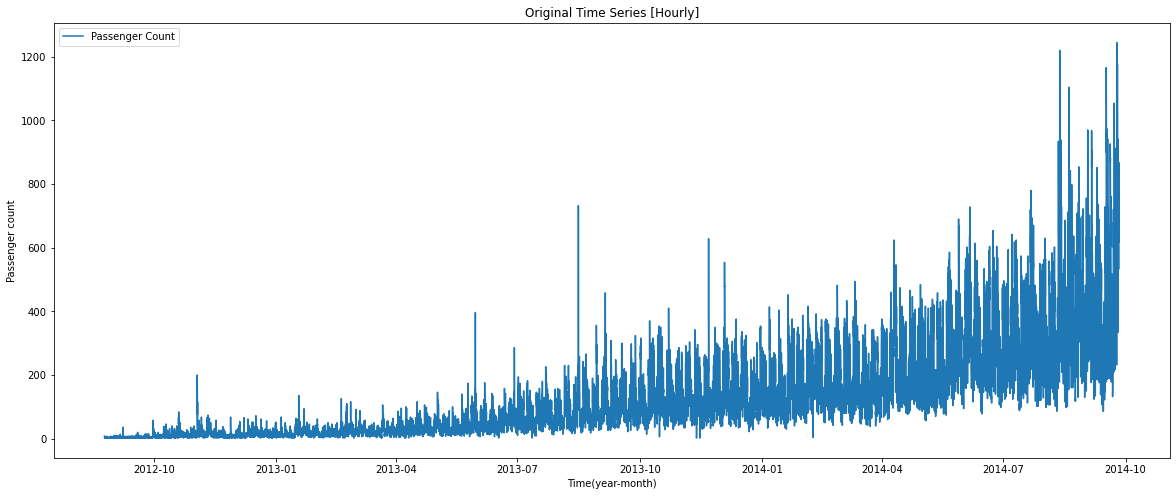

In [9]:
plt.figure(figsize=(20,8))
plt.plot(data['Count'], label='Passenger Count')
plt.title('Original Time Series [Hourly]')
plt.xlabel("Time(year-month)")
plt.ylabel("Passenger count")
plt.legend(loc='best');

In [10]:
data

,Count,Year,Month,Day,Hour,dayOfWeek,is_weekend
Datetime,,,,,,,
2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2,2012,8,25,4,5,1
...,...,...,...,...,...,...,...
2014-09-25 19:00:00,868,2014,9,25,19,3,0
2014-09-25 20:00:00,732,2014,9,25,20,3,0
2014-09-25 21:00:00,702,2014,9,25,21,3,0


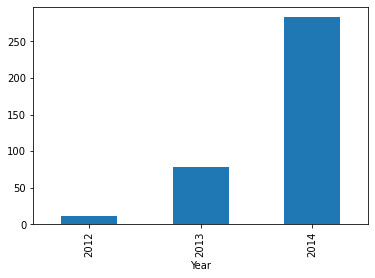

In [11]:
data.groupby('Year')['Count'].mean().plot.bar();

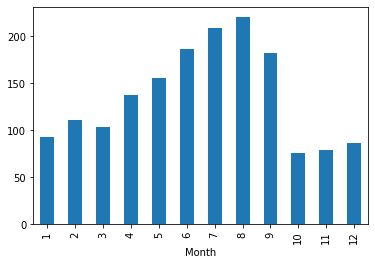

In [12]:
data.groupby('Month')['Count'].mean().plot.bar();

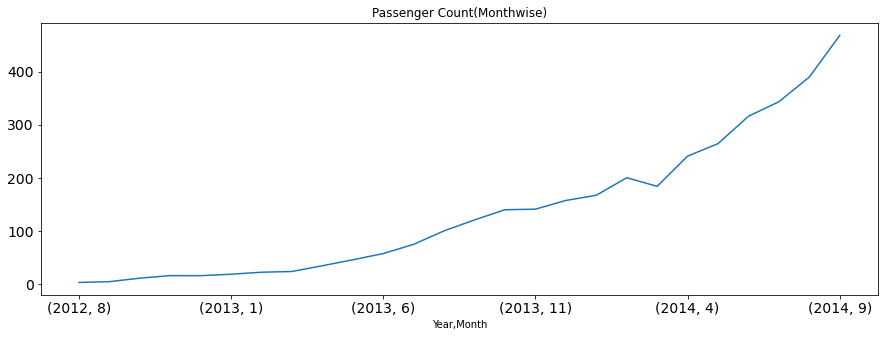

In [13]:
temp=data.groupby(['Year', 'Month'])['Count'].mean()
temp.plot(figsize=(15,5), title= 'Passenger Count(Monthwise)', fontsize=14);

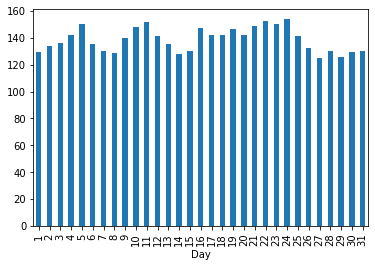

In [14]:
data.groupby('Day')['Count'].mean().plot.bar();

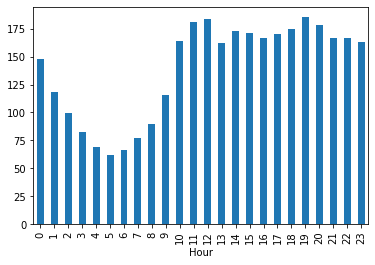

In [15]:
data.groupby('Hour')['Count'].mean().plot.bar();

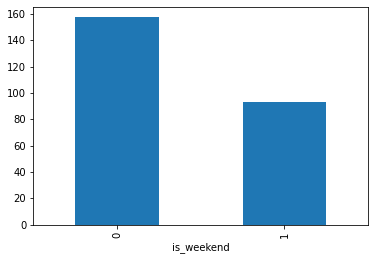

In [16]:
data.groupby('is_weekend')['Count'].mean().plot.bar();

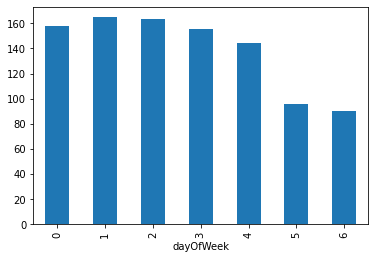

In [17]:
data.groupby('dayOfWeek')['Count'].mean().plot.bar();

## Determine the Granularity of Predicitions

In [18]:
# Hourly time series [Original]
hourly = data.resample('H').mean()
# Converting to daily mean
daily = data.resample('D').mean()
# Converting to weekly mean
weekly = data.resample('W').mean()
# Converting to monthly mean
monthly = data.resample('M').mean()

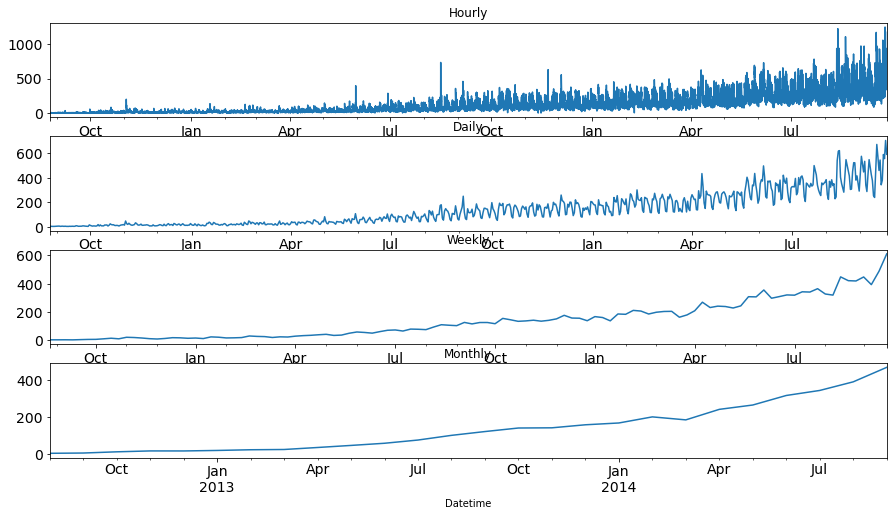

In [19]:
fig, axs = plt.subplots(4,1)
hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0])
daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1])
weekly.Count.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2])
monthly.Count.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3]);

In [20]:
data_daily=pd.DataFrame(data.resample('D').mean()['Count']).round(0)
data_daily

,Count
Datetime,
2012-08-25,3.0
2012-08-26,4.0
2012-08-27,3.0
2012-08-28,2.0
2012-08-29,2.0
...,...
2014-09-21,379.0
2014-09-22,588.0
2014-09-23,554.0


## Validation Strategy

In [ ]:
print(data_daily.index.min())
print(data_daily.index.max())

In [21]:
import datetime as dt
ref_dt1 = dt.datetime(2014,7,24)
print(ref_dt1)

2014-07-24 00:00:00


In [22]:
train=data_daily.loc[:ref_dt1]
train

,Count
Datetime,
2012-08-25,3.0
2012-08-26,4.0
2012-08-27,3.0
2012-08-28,2.0
2012-08-29,2.0
...,...
2014-07-20,341.0
2014-07-21,498.0
2014-07-22,459.0


In [23]:
ref_dt2 = dt.datetime(2014,7,25)
print(ref_dt2)

2014-07-25 00:00:00


In [24]:
valid=data_daily.loc[ref_dt2:]
valid

,Count
Datetime,
2014-07-25,300.0
2014-07-26,273.0
2014-07-27,254.0
2014-07-28,356.0
2014-07-29,342.0
...,...
2014-09-21,379.0
2014-09-22,588.0
2014-09-23,554.0


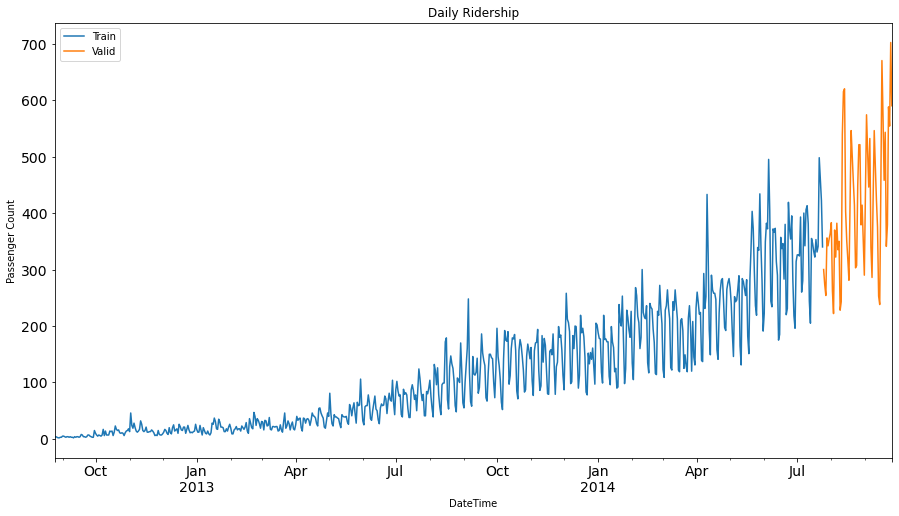

In [25]:
train.Count.plot(figsize=(15,8),title='Daily Ridership',fontsize=14,label='Train')
valid.Count.plot(figsize=(15,8),title='Daily Ridership',fontsize=14,label='Valid')
plt.xlabel('DateTime')
plt.ylabel('Passenger Count')
plt.legend(loc='best')
plt.show();

# Task Two: Stationarity Check and ADF Test

## <center> Option - 1 [Visualization]

In [26]:
rolmean = train.rolling(30).mean() # 30 days a month
rolstd = train.rolling(30).std()

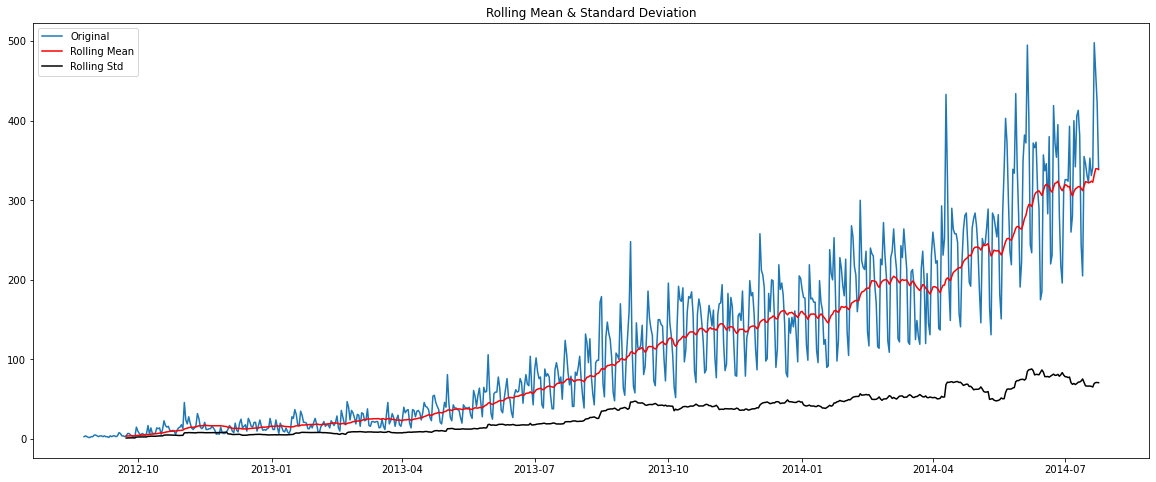

In [27]:
#Plot rolling statistics:
plt.figure(figsize=(20,8))
orig = plt.plot(train, label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show();

## <center> Option - 2 [ADF Test]


- Time Series is said to be stationary if its statistical properties such as mean, variance remain constant over time 
- ADF : The augmented Dicky-Fuller test:

 Null Hypothesis: Series is not stationary

 Alternate Hypothesis: Series is stationary

In [28]:
from statsmodels.tsa.stattools import adfuller

In [29]:
dftest=adfuller(train['Count'])
dftest

(1.6444223360256491,
 0.9979849123787883,
 20,
 678,
 {'1%': -3.4400317565062455,
  '5%': -2.8658123184971576,
  '10%': -2.56904513726821},
 6369.736158474478)

__Result:__ 

* 0th element is test statistic ,more negative means more likely to be stationary

* 1st element is p-value
If p-value is small→reject null hypothesis. Reject non-stationary.

* 2nd lags used

* 3d num of observations

* 4th element is the critical test statistics

In [30]:
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
dfoutput

Test Statistic                   1.644422
p-value                          0.997985
#Lags Used                      20.000000
Number of Observations Used    678.000000
dtype: float64

In [31]:
for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Test Statistic                   1.644422
p-value                          0.997985
#Lags Used                      20.000000
Number of Observations Used    678.000000
Critical Value (1%)             -3.440032
Critical Value (5%)             -2.865812
Critical Value (10%)            -2.569045
dtype: float64


## <center> Making the Time Series Stationary:

__Examples of transforms:__

* Take the log : np.log(df)
* Taking the difference : Δyt = yt − yt−1
* Take the square root : np.sqrt(df)
* Take the proportional change : df.shift(1)/df

In [32]:
np.log(1)

0.0

In [ ]:
np.log(10)

In [ ]:
np.log(100)

In [ ]:
np.log(1000)

In [ ]:
np.log(10000)

In [33]:
np.log(100000)

11.512925464970229

In [34]:
train_log=np.log(train)
train_log

,Count
Datetime,
2012-08-25,1.098612
2012-08-26,1.386294
2012-08-27,1.098612
2012-08-28,0.693147
2012-08-29,0.693147
...,...
2014-07-20,5.831882
2014-07-21,6.210600
2014-07-22,6.129050


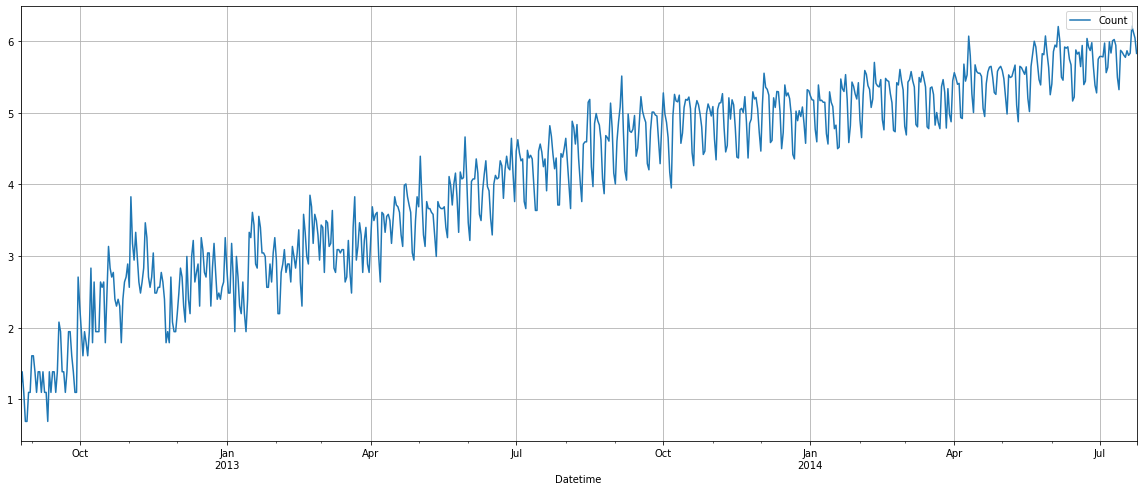

In [35]:
train_log.plot(figsize=(20,8),grid=True);

In [36]:
dftest=adfuller(train_log)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
dfoutput

Test Statistic                  -2.332987
p-value                          0.161549
#Lags Used                      20.000000
Number of Observations Used    678.000000
dtype: float64

In [37]:
train_log

,Count
Datetime,
2012-08-25,1.098612
2012-08-26,1.386294
2012-08-27,1.098612
2012-08-28,0.693147
2012-08-29,0.693147
...,...
2014-07-20,5.831882
2014-07-21,6.210600
2014-07-22,6.129050


In [40]:
train_log_diff = train_log.diff()
train_log_diff

,Count
Datetime,
2012-08-25,NaN
2012-08-26,0.287682
2012-08-27,-0.287682
2012-08-28,-0.405465
2012-08-29,0.000000
...,...
2014-07-20,0.029764
2014-07-21,0.378718
2014-07-22,-0.081550


In [41]:
train_log_diff = train_log_diff.dropna()
train_log_diff

,Count
Datetime,
2012-08-26,0.287682
2012-08-27,-0.287682
2012-08-28,-0.405465
2012-08-29,0.000000
2012-08-30,0.405465
...,...
2014-07-20,0.029764
2014-07-21,0.378718
2014-07-22,-0.081550


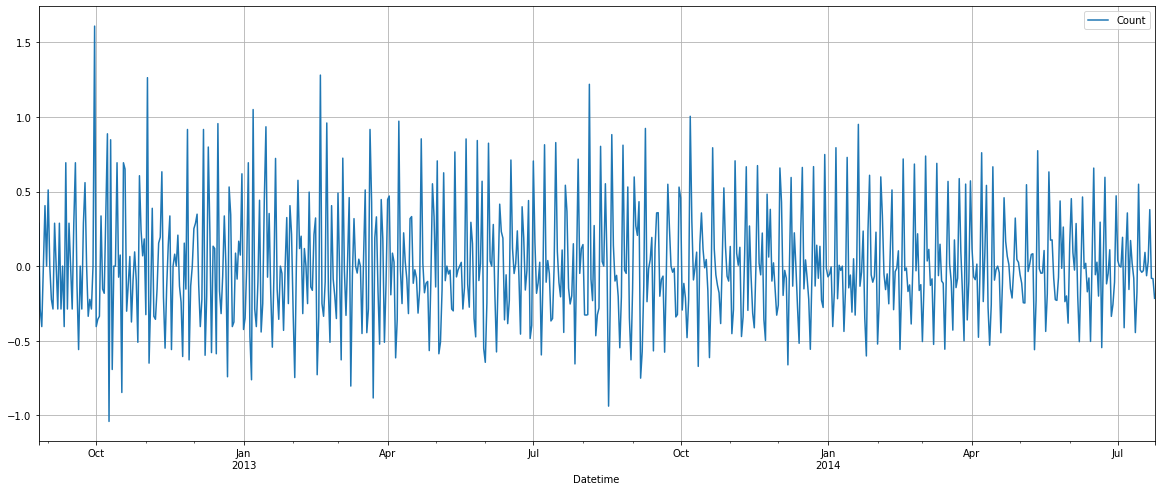

In [42]:
train_log_diff.plot(figsize=(20,8),grid=True);

In [43]:
dftest=adfuller(train_log_diff)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
dfoutput

Test Statistic                -8.269603e+00
p-value                        4.833193e-13
#Lags Used                     1.900000e+01
Number of Observations Used    6.780000e+02
dtype: float64

# Task Three: Autocorrelation, ACF and PACF


__ACF:__ Autocorrelation Function

__PACF:__  Partial autocorrelation function

In [44]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

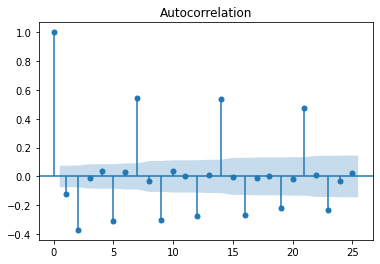

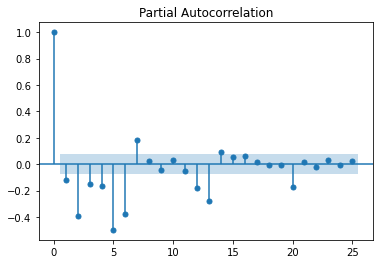

In [45]:
plot_acf(train_log_diff['Count'],lags=25);
plot_pacf(train_log_diff['Count'],lags=25);

# Task Four: ARIMA Model

### ARIMA(p, d, q)
* __Autoregression - AR(p):__ Y = B0 + B1*Y_lag1 + B2*Y_lag2 + ... + Bn*Y_lagn
* __Moving Average - MA(q):__ Y = B0 + B1*E_lag1 + B2*E_lag2 + ... + Bn*E_lagn
* __Integrated - (d)__: Y_forward1 - Y = B0 + B1*(Y - Y_lag1) + B2*(Y_lag1 - Y_lag2) +..

* __Example: ARMA(1,0,1)__

yt = 0.5 * yt −1 + 0.2 * ϵt−1 + ϵt

In [46]:
from statsmodels.tsa.arima_model import ARIMA

In [47]:
model_ARMA=ARIMA(train_log_diff['Count'],order=(2,0,2)).fit()

In [48]:
model_ARMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Count   No. Observations:                  698
Model:                     ARMA(2, 2)   Log Likelihood                -185.134
Method:                       css-mle   S.D. of innovations              0.315
Date:                Sun, 14 Aug 2022   AIC                            382.269
Time:                        11:00:55   BIC                            409.558
Sample:                    08-26-2012   HQIC                           392.819
                         - 07-24-2014                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0069      0.002      4.299      0.000       0.004       0.010
ar.L1.Count     0.2566      0.121      2.121      0.034       0.019       0.494
ar.L2.Count    -0.2300      0.066     -3.463      0.001      -0.360      -0.100
ma.L1.Count    -0.6840      0.123     -5.540      0.000      -0.926      -0.442
ma.L2.Count    -0.1872      0.118     -1.592      0.111      -0.418       0.043
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.5578           -2.0092j            2.0852           -0.2069
AR.2            0.5578           +2.0092j            2.0852            0.2069
MA.1            1.1192           +0.0000j            1.1192            0.0000
MA.2           -4.7722           +0.0000j            4.7722            0.5000
-----------------------------------------------------------------------------
"""

In [49]:
model_ARMA.fittedvalues

Datetime
2012-08-26    0.006872
2012-08-27   -0.027968
2012-08-28   -0.056830
2012-08-29    0.185969
2012-08-30    0.260435
                ...   
2014-07-20    0.007799
2014-07-21    0.027582
2014-07-22   -0.147254
2014-07-23   -0.212023
2014-07-24   -0.095954
Freq: D, Length: 698, dtype: float64

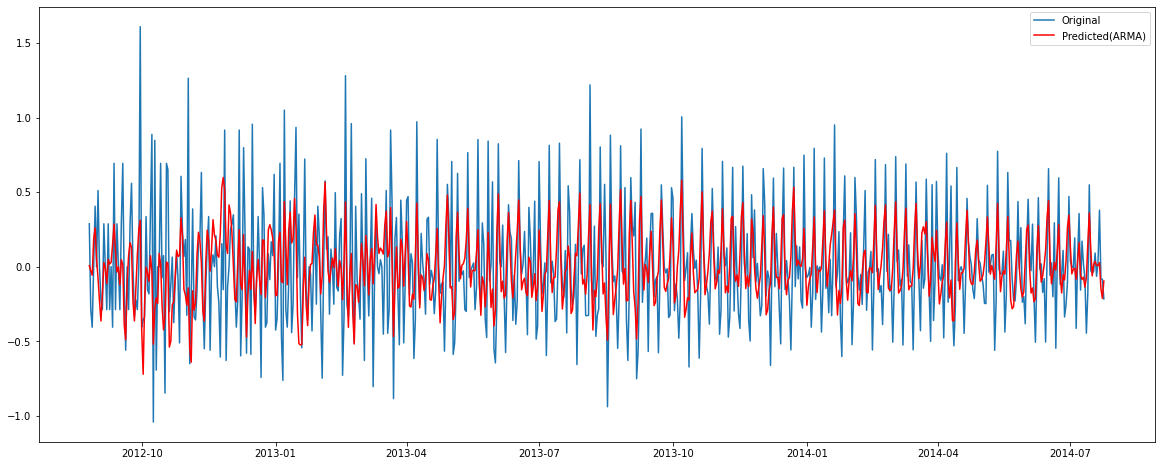

In [50]:
plt.figure(figsize=(20,8))
plt.plot(train_log_diff['Count'],label='Original')
plt.plot(model_ARMA.fittedvalues,color='red',label='Predicted(ARMA)')
plt.legend(loc='best')
plt.show();

In [51]:
valid.index.min()

Timestamp('2014-07-25 00:00:00', freq='D')

In [52]:
valid.index.max()

Timestamp('2014-09-25 00:00:00', freq='D')

In [53]:
ARIMA_Pred_Diff=model_ARMA.predict(start=valid.index.min(),end=valid.index.max())
ARIMA_Pred_Diff

2014-07-25    0.028765
2014-07-26    0.086251
2014-07-27    0.022205
2014-07-28   -0.007451
2014-07-29   -0.000330
                ...   
2014-09-21    0.006872
2014-09-22    0.006872
2014-09-23    0.006872
2014-09-24    0.006872
2014-09-25    0.006872
Freq: D, Length: 63, dtype: float64

In [54]:
predict_diff= ARIMA_Pred_Diff.cumsum().shift().fillna(0)
predict_diff

2014-07-25    0.000000
2014-07-26    0.028765
2014-07-27    0.115016
2014-07-28    0.137221
2014-07-29    0.129770
                ...   
2014-09-21    0.496832
2014-09-22    0.503704
2014-09-23    0.510576
2014-09-24    0.517448
2014-09-25    0.524319
Freq: D, Length: 63, dtype: float64

In [55]:
predict_base = pd.Series(np.ones(valid.shape[0]) * np.log(train['Count'])[-1],index = valid.index)
predict_base

Datetime
2014-07-25    5.828946
2014-07-26    5.828946
2014-07-27    5.828946
2014-07-28    5.828946
2014-07-29    5.828946
                ...   
2014-09-21    5.828946
2014-09-22    5.828946
2014-09-23    5.828946
2014-09-24    5.828946
2014-09-25    5.828946
Freq: D, Length: 63, dtype: float64

In [56]:
 np.log(train['Count'])[-1]

5.8289456176102075

In [57]:
predict_log = predict_base.add(predict_diff,fill_value=0)
predict_log

Datetime
2014-07-25    5.828946
2014-07-26    5.857711
2014-07-27    5.943962
2014-07-28    5.966166
2014-07-29    5.958715
                ...   
2014-09-21    6.325778
2014-09-22    6.332650
2014-09-23    6.339521
2014-09-24    6.346393
2014-09-25    6.353265
Freq: D, Length: 63, dtype: float64

In [58]:
predict = np.exp(predict_log).round(0)
predict

Datetime
2014-07-25    340.0
2014-07-26    350.0
2014-07-27    381.0
2014-07-28    390.0
2014-07-29    387.0
              ...  
2014-09-21    559.0
2014-09-22    563.0
2014-09-23    567.0
2014-09-24    570.0
2014-09-25    574.0
Freq: D, Length: 63, dtype: float64

In [59]:
valid['F_ARMA']=predict
valid

,Count,F_ARMA
Datetime,,
2014-07-25,300.0,340.0
2014-07-26,273.0,350.0
2014-07-27,254.0,381.0
2014-07-28,356.0,390.0
2014-07-29,342.0,387.0
...,...,...
2014-09-21,379.0,559.0
2014-09-22,588.0,563.0
2014-09-23,554.0,567.0


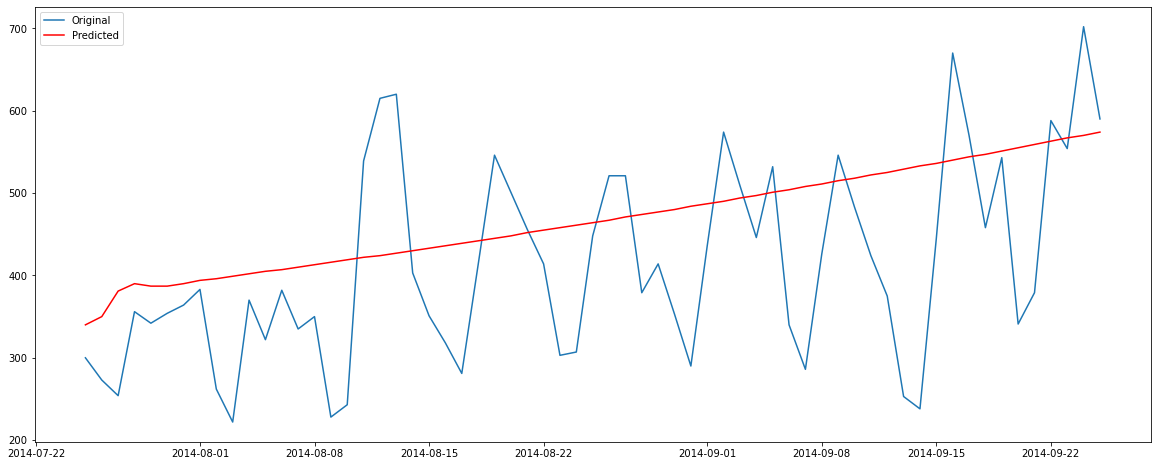

In [60]:
plt.figure(figsize=(20,8))
plt.plot(valid['Count'],label='Original')
plt.plot(valid['F_ARMA'],color='red',label='Predicted')
plt.legend(loc='best')
plt.show();

In [61]:
from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(valid.Count, valid.F_ARMA))
print(rms)

116.61862956622652


## SARIMA [Bonus - 1]

In [62]:
import statsmodels.api as sm

In [63]:
model_SARIMA = sm.tsa.statespace.SARIMAX(train_log_diff['Count'], order=(2, 0, 2),seasonal_order=(2,0,2,7)).fit()
model_SARIMA.summary()

C:\Users\pogupt\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             Count   No. Observations:                  698
Model:             SARIMAX(2, 0, 2)x(2, 0, 2, 7)   Log Likelihood                  -2.026
Date:                           Sun, 14 Aug 2022   AIC                             22.051
Time:                                   11:10:28   BIC                             62.985
Sample:                               08-26-2012   HQIC                            37.877
                                    - 07-24-2014                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2488      0.406      0.613      0.540      -0.546       1.044
ar.L2         -0.0358      0.171     -0.209      0.834      -0.371       0.299
ma.L1         -0.7138      0.407     -1.755      0.079      -1.511       0.084
ma.L2         -0.1364      0.364     -0.374      0.708      -0.851       0.578
ar.S.L7        0.2156      0.255      0.847      0.397      -0.283       0.715
ar.S.L14       0.7654      0.253      3.022      0.003       0.269       1.262
ma.S.L7       -0.1344      0.271     -0.496      0.620      -0.665       0.396
ma.S.L14      -0.6428      0.245     -2.622      0.009      -1.123      -0.162
sigma2         0.0581      0.002     29.175      0.000       0.054       0.062
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               431.25
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.17   Skew:                             0.83
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [65]:
SARIMA_Pred_Diff=model_SARIMA.predict(start=valid.index.min(),end=valid.index.max())
SARIMA_Pred_Diff

2014-07-25    0.058744
2014-07-26   -0.292684
2014-07-27   -0.039423
2014-07-28    0.482918
2014-07-29   -0.020013
                ...   
2014-09-21   -0.037827
2014-09-22    0.436185
2014-09-23   -0.023767
2014-09-24    0.014032
2014-09-25   -0.043513
Freq: D, Name: predicted_mean, Length: 63, dtype: float64

In [66]:
predict_diff= SARIMA_Pred_Diff.cumsum().shift().fillna(0)
predict_diff

2014-07-25    0.000000
2014-07-26    0.058744
2014-07-27   -0.233940
2014-07-28   -0.273363
2014-07-29    0.209555
                ...   
2014-09-21    0.034170
2014-09-22   -0.003658
2014-09-23    0.432527
2014-09-24    0.408760
2014-09-25    0.422792
Freq: D, Name: predicted_mean, Length: 63, dtype: float64

In [67]:
predict_log = predict_base.add(predict_diff,fill_value=0)
predict = np.exp(predict_log).round(0)
predict

Datetime
2014-07-25    340.0
2014-07-26    361.0
2014-07-27    269.0
2014-07-28    259.0
2014-07-29    419.0
              ...  
2014-09-21    352.0
2014-09-22    339.0
2014-09-23    524.0
2014-09-24    512.0
2014-09-25    519.0
Freq: D, Length: 63, dtype: float64

In [68]:
valid['F_SARIMA'] = predict
valid

,Count,F_ARMA,F_SARIMA
Datetime,,,
2014-07-25,300.0,340.0,340.0
2014-07-26,273.0,350.0,361.0
2014-07-27,254.0,381.0,269.0
2014-07-28,356.0,390.0,259.0
2014-07-29,342.0,387.0,419.0
...,...,...,...
2014-09-21,379.0,559.0,352.0
2014-09-22,588.0,563.0,339.0
2014-09-23,554.0,567.0,524.0


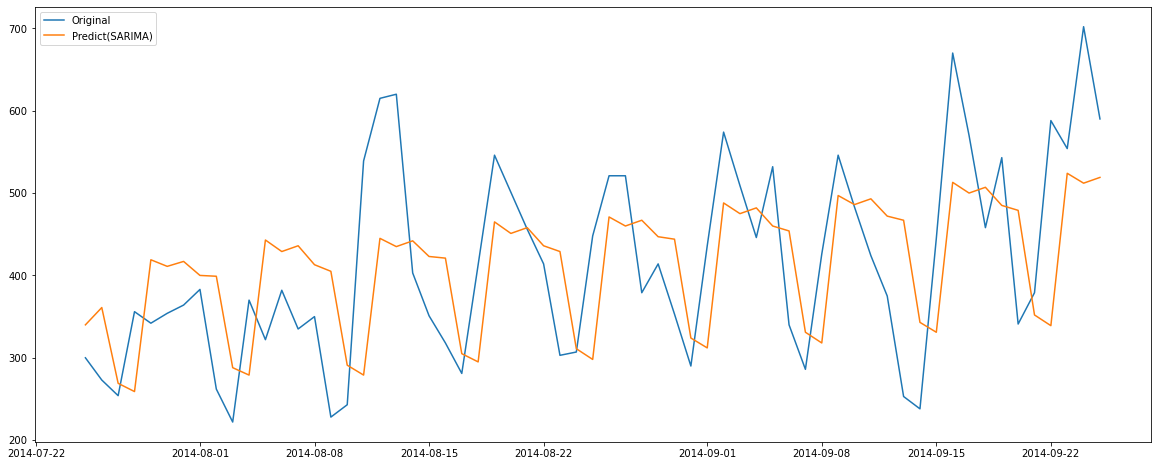

In [69]:
plt.figure(figsize=(20,8))
plt.plot(valid['Count'], label='Original')
plt.plot(valid['F_SARIMA'], label='Predict(SARIMA)')
plt.legend(loc='best')
plt.show();

In [70]:
rms = np.sqrt(mean_squared_error(valid.Count, valid.F_SARIMA))
print(rms)

102.73274002486195
